## import library  

In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import matplotlib.pyplot as plt

## read data

In [45]:
path_data_istabul = 'data/Istanbul Weather Data normalization.csv'

df = pd.read_csv(path_data_istabul)
print(df.shape)
df.head(10)

(3896, 7)


,DateTime,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,2009-01-01,0.005476,0.200,0.225806,0.148148,0.877193,0.760870
1,2009-01-02,0.106667,0.175,0.193548,0.185185,0.859649,0.630435
2,2009-01-03,0.001905,0.200,0.258065,0.259259,0.947368,0.630435
3,2009-01-04,0.069286,0.200,0.258065,0.129630,0.947368,0.478261
4,2009-01-05,0.102857,0.200,0.258065,0.240741,1.000000,0.500000
5,2009-01-06,0.064524,0.200,0.258065,0.370370,0.982456,0.478261
6,2009-01-07,0.005476,0.250,0.225806,0.166667,0.842105,0.652174
7,2009-01-08,0.072857,0.275,0.193548,0.185185,0.842105,0.695652
8,2009-01-09,0.030000,0.150,0.161290,0.388889,0.754386,0.891304
9,2009-01-10,0.000000,0.200,0.161290,0.092593,0.736842,0.782609


In [46]:
def re_organize(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df.set_index("DateTime",inplace=True)
    return df
df= re_organize(df)
df

,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
DateTime,,,,,,
2009-01-01,0.005476,0.200,0.225806,0.148148,0.877193,0.760870
2009-01-02,0.106667,0.175,0.193548,0.185185,0.859649,0.630435
2009-01-03,0.001905,0.200,0.258065,0.259259,0.947368,0.630435
2009-01-04,0.069286,0.200,0.258065,0.129630,0.947368,0.478261
2009-01-05,0.102857,0.200,0.258065,0.240741,1.000000,0.500000
...,...,...,...,...,...,...
2019-08-28,0.000000,0.750,0.903226,0.407407,0.368421,0.500000
2019-08-29,0.000000,0.750,0.870968,0.333333,0.421053,0.521739
2019-08-30,0.011905,0.725,0.870968,0.370370,0.403509,0.500000


In [52]:
def shift(data,name):
    data[str(name)+str("_shift")]=data[str(name)].shift(-1)
    data=data.dropna(how='any')
    return data

df = shift(df,"Rain")
df

/Users/nakamura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure,Rain_shift
DateTime,,,,,,,
2009-01-02,0.106667,0.175,0.193548,0.185185,0.859649,0.630435,0.001905
2009-01-03,0.001905,0.200,0.258065,0.259259,0.947368,0.630435,0.069286
2009-01-04,0.069286,0.200,0.258065,0.129630,0.947368,0.478261,0.102857
2009-01-05,0.102857,0.200,0.258065,0.240741,1.000000,0.500000,0.064524
2009-01-06,0.064524,0.200,0.258065,0.370370,0.982456,0.478261,0.005476
...,...,...,...,...,...,...,...
2019-08-27,0.000000,0.775,0.935484,0.462963,0.315789,0.521739,0.000000
2019-08-28,0.000000,0.750,0.903226,0.407407,0.368421,0.500000,0.000000
2019-08-29,0.000000,0.750,0.870968,0.333333,0.421053,0.521739,0.011905


In [66]:
lookback = 120
cols_train = ['Rain','MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
cols_target = ['Rain_shift']


df_train_transformed = df.reset_index(drop=True)


X_train = df.loc[:,cols_train]
y_train = df.loc[:,cols_target]
print("X_train sahpe",X_train.shape)
print("y_train sahpe",y_train.shape)

X_train sahpe (3894, 6)
y_train sahpe (3894, 1)


In [67]:
#データの分割
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [68]:
type(y_train)
# X_train.shape

pandas.core.frame.DataFrame

## model(light-GBM) 

In [110]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

# LightGBM parameters
params = {
        'task' : 'train',
        'boosting':'gbdt',
        'objective' : 'regression',
        'metric' : {'rmse'},
        'num_leaves':50,
        'drop_rate':0.10,
        'learning_rate':0.01,
        'seed':0,
        'verbose':0,
        'device': 'cpu'
}

evaluation_results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=3000,
                valid_sets=[lgb_train, lgb_eval],
                valid_names=['Train', 'Valid'],
                evals_result=evaluation_results,
                early_stopping_rounds=2000,
                verbose_eval=100)

Training until validation scores don't improve for 2000 rounds
[100]	Train's rmse: 0.0467552	Valid's rmse: 0.103943
[200]	Train's rmse: 0.0435807	Valid's rmse: 0.103034
[300]	Train's rmse: 0.0412704	Valid's rmse: 0.102902
[400]	Train's rmse: 0.0394639	Valid's rmse: 0.103
[500]	Train's rmse: 0.0379443	Valid's rmse: 0.103095
[600]	Train's rmse: 0.0366669	Valid's rmse: 0.103452
[700]	Train's rmse: 0.0354974	Valid's rmse: 0.103626
[800]	Train's rmse: 0.0343894	Valid's rmse: 0.103893
[900]	Train's rmse: 0.0333944	Valid's rmse: 0.103793
[1000]	Train's rmse: 0.0324435	Valid's rmse: 0.103983
[1100]	Train's rmse: 0.0315531	Valid's rmse: 0.10396
[1200]	Train's rmse: 0.0307448	Valid's rmse: 0.104068
[1300]	Train's rmse: 0.030052	Valid's rmse: 0.104256
[1400]	Train's rmse: 0.0293955	Valid's rmse: 0.104161
[1500]	Train's rmse: 0.0287541	Valid's rmse: 0.104203
[1600]	Train's rmse: 0.0281231	Valid's rmse: 0.104128
[1700]	Train's rmse: 0.0275243	Valid's rmse: 0.104145
[1800]	Train's rmse: 0.0269735	Va

## check predict

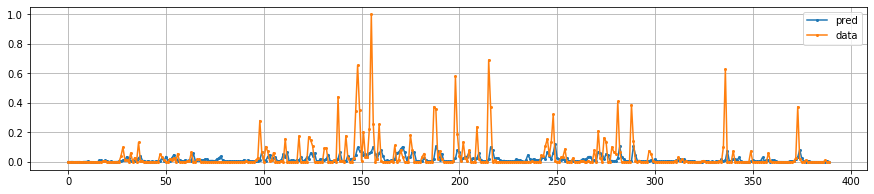

In [111]:
y_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
fig = plt.figure(figsize=(15,3))
plt.plot(range(len(X_val)),y_pred, marker='o', markersize=2, label='pred')
plt.plot(range(len(X_val)),y_val, marker='o', markersize=2, label='data')
plt.legend()
plt.grid()

## compute feature importance
https://mathmatical22.xyz/2020/04/12/【初心者向け】特徴量重要度の算出-lightgbm-【python】【機/

In [117]:
# 特徴量重要度の算出 (データフレームで取得)
cols_train = ['Rain','MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
f_importance = np.array(gbm.feature_importance()) 
f_importance = f_importance / np.sum(f_importance)  
df_importance = pd.DataFrame({'feature':cols_train, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) 
df_importance

,feature,importance
0,Rain,0.242066
4,AvgHumidity,0.179606
3,AvgWind,0.163701
5,AvgPressure,0.158109
1,MaxTemp,0.139662
2,MinTemp,0.116857


Text(0, 0.5, 'Feature')

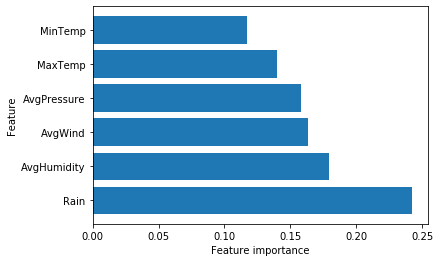

In [118]:
plt.barh(range(len(df_importance)), df_importance["importance"].values, align='center') 
cols_plot = df_importance['feature'].values             # 特徴量の取得 
plt.yticks(np.arange(len(df_importance)), cols_plot)      # x軸,y軸の値の設定
plt.xlabel('Feature importance')                  # x軸のタイトル
plt.ylabel('Feature')                             # y軸のタイトル

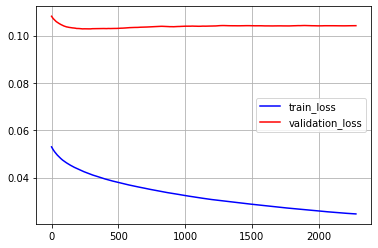

In [119]:
plt.plot(range(len(evaluation_results["Train"]["rmse"])),evaluation_results["Train"]["rmse"],
         color='blue', linestyle='-', label='train_loss')
plt.plot(range(len(evaluation_results["Valid"]["rmse"])), evaluation_results["Valid"]["rmse"],
         color='r', linestyle='-', label='validation_loss')

plt.legend()
plt.grid()